In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import torch
from torch import nn

In [2]:
def NORM(img):
    Min = np.min(img)
    Max = np.max(img)
    img = (img-Min)/(Max-Min+1e-10)
    return(img)

In [3]:

def Dice( y_true, y_pred):
    smooth = 1
    iflat = y_pred.contiguous().view(-1)
    tflat = y_true.contiguous().view(-1)
    intersection = (iflat * tflat).sum()

    A_sum = torch.sum(iflat * iflat)
    B_sum = torch.sum(tflat * tflat)

    dice_score = (2. * intersection + smooth) / (A_sum + B_sum + smooth) 
    return dice_score

In [4]:
path = './Result_test/'
List = sorted(os.listdir(path))

In [5]:
print(List)

['Att_fixed_us_12_slice10.npy', 'Att_fixed_us_12_slice11.npy', 'Att_fixed_us_12_slice12.npy', 'Att_fixed_us_12_slice13.npy', 'Att_fixed_us_12_slice14.npy', 'Att_fixed_us_12_slice15.npy', 'Att_fixed_us_12_slice16.npy', 'Att_fixed_us_12_slice5.npy', 'Att_fixed_us_12_slice6.npy', 'Att_fixed_us_12_slice7.npy', 'Att_fixed_us_12_slice8.npy', 'Att_fixed_us_12_slice9.npy', 'Att_moving_us_12_slice10.npy', 'Att_moving_us_12_slice11.npy', 'Att_moving_us_12_slice12.npy', 'Att_moving_us_12_slice13.npy', 'Att_moving_us_12_slice14.npy', 'Att_moving_us_12_slice15.npy', 'Att_moving_us_12_slice16.npy', 'Att_moving_us_12_slice5.npy', 'Att_moving_us_12_slice6.npy', 'Att_moving_us_12_slice7.npy', 'Att_moving_us_12_slice8.npy', 'Att_moving_us_12_slice9.npy', 'df_us_12_slice10.npy', 'df_us_12_slice11.npy', 'df_us_12_slice12.npy', 'df_us_12_slice13.npy', 'df_us_12_slice14.npy', 'df_us_12_slice15.npy', 'df_us_12_slice16.npy', 'df_us_12_slice5.npy', 'df_us_12_slice6.npy', 'df_us_12_slice7.npy', 'df_us_12_slice8

In [161]:
S = 16
img_us =np.load('./Result_test/us_us_12_slice'+str(S)+'.npy')
img_mr = np.load('./Result_test/mr_us_12_slice'+str(S)+'.npy')
w_mr = np.load('./Result_test/warped_mr_img_us_12_slice'+str(S)+'.npy')
w_mr_mask = np.load('./Result_test/warped_mask_us_12_slice'+str(S)+'.npy')
df_0=np.load('./Result_test/df_us_12_slice'+str(S)+'.npy')
us_mask = np.load('./Result_test/mask_fixed_us_12_slice'+str(S)+'.npy')
mr_mask = np.load('./Result_test/mask_moving_us_12_slice'+str(S)+'.npy')
map_moving = np.load('./Result_test/map_moving_us_12_slice'+str(S)+'.npy')
map_fixed = np.load('./Result_test/map_fixed_us_12_slice'+str(S)+'.npy')
Att_fixed = np.load('./Result_test/Att_fixed_us_12_slice'+str(S)+'.npy')
Att_moving = np.load('./Result_test/Att_moving_us_12_slice'+str(S)+'.npy')

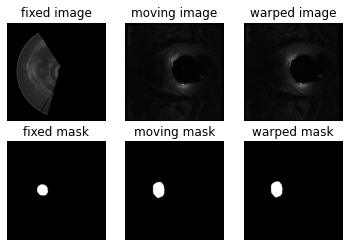

In [162]:
fig = plt.figure()
plt.subplot(231)
plt.imshow(img_us,cmap='gray')
plt.axis('off')
plt.title('fixed image')

plt.subplot(232)
plt.imshow(img_mr,cmap='gray')
plt.axis('off')
plt.title('moving image')

plt.subplot(233)
plt.imshow(w_mr,cmap='gray')
plt.axis('off')
plt.title('warped image')

plt.subplot(234)
plt.imshow(us_mask,cmap='gray')
plt.axis('off')
plt.title('fixed mask')

plt.subplot(235)
plt.imshow(mr_mask,cmap='gray')
plt.axis('off')
plt.title('moving mask')

plt.subplot(236)
plt.imshow(w_mr_mask ,cmap='gray')
plt.axis('off')
plt.title('warped mask')

fig.savefig('./Result_test/slice_'+str(S),transparent=True,format='png',facecolor='w')

Text(0.5, 1.0, 'Att moving')

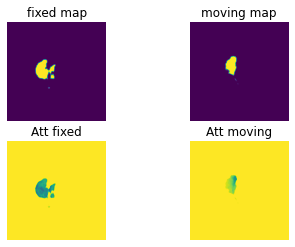

In [163]:
plt.subplot(221)
plt.imshow(map_fixed)
plt.axis('off')
plt.title('fixed map')

plt.subplot(222)
plt.imshow(map_moving)
plt.axis('off')
plt.title('moving map')

plt.subplot(223)
plt.imshow(Att_fixed)
plt.axis('off')
plt.title('Att fixed')

plt.subplot(224)
plt.imshow(Att_moving)
plt.axis('off')
plt.title('Att moving')

In [164]:
print(Att_fixed)

[[-0.38796234 -0.38796234 -0.38796234 ... -0.38796234 -0.38796234
  -0.38796234]
 [-0.38796234 -0.38796234 -0.38796234 ... -0.38796234 -0.38796234
  -0.38796234]
 [-0.38796234 -0.38796234 -0.38796234 ... -0.38796234 -0.38796234
  -0.38796234]
 ...
 [-0.38796234 -0.38796234 -0.38796234 ... -0.38796234 -0.38796234
  -0.38796234]
 [-0.38796234 -0.38796234 -0.38796234 ... -0.38796234 -0.38796234
  -0.38796234]
 [-0.38796234 -0.38796234 -0.38796234 ... -0.38796234 -0.38796234
  -0.38796234]]


In [165]:
print(np.min(Att_fixed))

-0.6467773


In [166]:
print('Dice score before reg: ', Dice(torch.tensor(us_mask),torch.tensor(mr_mask)))
print('Dice score after reg: ', Dice(torch.tensor(us_mask),torch.tensor(w_mr_mask)))

Dice score before reg:  tensor(0.7050)
Dice score after reg:  tensor(0.6230)


In [167]:
########### with alpha= 0.01 for regularization
Before_reg = np.array([0.3036,0.6242,0.8550,0.8026,0.8416,0.8859,0.9297,0.9221,0.843,0.7941,0.6378,0.7050])
After_reg = np.array([0.3154,0.636133,0.867019,0.813453,0.852445,0.896470,0.935031,0.930919,0.848183,0.798138,0.641575,0.701715])
Dice_before = np.mean(Before_reg)
Dice_after = np.mean(After_reg)
std_before = np.std(Before_reg)
std_after = np.std(After_reg)
print('Dice score before registration is:',Dice_before, std_before)
print('Dice score after registration is:',Dice_after,std_after)

Dice score before registration is: 0.76205 0.16860344253108633
Dice score after registration is: 0.76970675 0.1682912891740216


In [168]:
########### with alpha= 0.001 for regularization
Before_reg = np.array([0.3036,0.6242,0.8550,0.8026,0.8416,0.8859,0.9297,0.9221,0.843,0.7941,0.6378,0.7050])
After_reg = np.array([0.6234,0.7867,0.8100,0.894469,0.852235,0.852796,0.791502,0.800188,0.749036,0.745239,0.629917,0.39493])
Dice_before = np.mean(Before_reg)
Dice_after = np.mean(After_reg)
print('Dice score before registration is:',Dice_before)
print('Dice score after registration is:',Dice_after)

Dice score before registration is: 0.76205
Dice score after registration is: 0.744201


In [169]:
########### with alpha= 0.0001 for regularization
Before_reg = np.array([0.3036,0.6242,0.8550,0.8026,0.8416,0.8859,0.9297,0.9221,0.843,0.7941,0.6378,0.7050])
After_reg = np.array([0.6227,0.7826,0.8392,0.9461,0.8824,0.9013,0.8499,0.8606,0.7639,0.7392,0.6439,0.4130])
Dice_before = np.mean(Before_reg)
Dice_after = np.mean(After_reg)
std_before = np.std(Before_reg)
std_after = np.std(After_reg)
print('Dice score before registration is:',Dice_before, std_before)
print('Dice score after registration is:',Dice_after,std_after)

Dice score before registration is: 0.76205 0.16860344253108633
Dice score after registration is: 0.7704000000000001 0.14331081024588946


In [170]:
Z = np.zeros(np.array(us_mask).shape)
overlap_mask_fw = [np.array(us_mask),np.array(w_mr_mask),Z]
overlap_mask_fw = np.transpose(np.array(overlap_mask_fw),(1,2,0))

Z = np.zeros(np.array(mr_mask).shape)
overlap_mask_mw = [np.array(mr_mask),np.array(w_mr_mask),Z]
overlap_mask_mw = np.transpose(np.array(overlap_mask_mw),(1,2,0))

Z = np.zeros(np.array(us_mask).shape)
overlap_mask_mf = [np.array(us_mask),np.array(mr_mask),Z]
overlap_mask_mf = np.transpose(np.array(overlap_mask_mf),(1,2,0))

In [171]:
dice_score_fw = Dice(torch.tensor(us_mask),torch.tensor(w_mr_mask))
dice_score_mw = Dice(torch.tensor(mr_mask),torch.tensor(w_mr_mask))
dice_score_fm = Dice(torch.tensor(us_mask),torch.tensor(mr_mask))

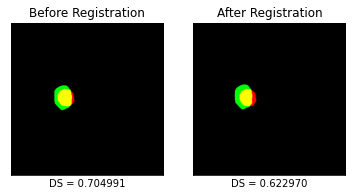

In [172]:
fig = plt.figure()

plt.subplot(1,2,2)
plt.imshow(overlap_mask_fw)
plt.xlabel("DS = {:f}".format(np.array(dice_score_fw)))
plt.title('After Registration')
plt.xticks([])
plt.yticks([])

# plt.subplot(1,3,2)
# plt.imshow(overlap_mask_mw)
# plt.title('moving-warped')
# plt.xlabel("DS = {:f}".format(np.array(dice_score_mw)))
# plt.xticks([])
# plt.yticks([])

plt.subplot(1,2,1)
plt.imshow(overlap_mask_mf)
plt.title('Before Registration')
plt.xlabel("DS = {:f}".format(np.array(dice_score_fm)))
plt.xticks([])
plt.yticks([])
fig.savefig('./Result_test/overlap_'+str(S),transparent=True,format='png',facecolor='w')

In [136]:
###########MS-2D-Wssamnet-with-leakyRelu
Before_reg = np.array([0.3,0.62,0.85,0.80,0.84,0.89,0.93,0.92,0.84,0.79,0.64,0.70])
After_reg = np.array([0.43,0.68,0.92,0.92,0.91,0.94,0.90,0.92,0.82,0.78,0.62,0.61])
Dice_before = np.mean(Before_reg)
Dice_after = np.mean(After_reg)
std_before = np.std(Before_reg)
std_after = np.std(After_reg)
print('Dice score before registration is:',Dice_before, std_before)
print('Dice score after registration is:',Dice_after,std_after)

Dice score before registration is: 0.7599999999999999 0.16931233465600395
Dice score after registration is: 0.7875 0.15906628597328012


In [173]:
###########MS-2D-Wssamnet-with-leakyRelu
Before_reg = np.array([0.3,0.62,0.85,0.80,0.84,0.89,0.93,0.92,0.84,0.79,0.64,0.70])
After_reg = np.array([0.39,0.68,0.92,0.88,0.9,0.96,0.93,0.95,0.85,0.8,0.64,0.62])
Dice_before = np.mean(Before_reg)
Dice_after = np.mean(After_reg)
std_before = np.std(Before_reg)
std_after = np.std(After_reg)
print('Dice score before registration is:',Dice_before, std_before)
print('Dice score after registration is:',Dice_after,std_after)

Dice score before registration is: 0.7599999999999999 0.16931233465600395
Dice score after registration is: 0.7933333333333333 0.1678954701261737


In [19]:
print(map_fixed)

[[1.6002312e-04 1.3858208e-04 5.2001287e-05 ... 3.7697580e-05
  4.7860638e-05 2.4896607e-04]
 [1.4243225e-04 7.9894860e-05 5.7813897e-05 ... 4.8601451e-05
  6.9801506e-05 4.2200667e-05]
 [7.1000642e-05 6.2049490e-05 4.4984583e-05 ... 5.1401417e-05
  5.8573776e-05 5.9904087e-05]
 ...
 [4.4899210e-05 5.2674270e-05 5.6563753e-05 ... 4.0571977e-05
  4.7429410e-05 7.0384762e-05]
 [7.1313807e-05 5.0809333e-05 4.2785152e-05 ... 3.4464607e-05
  2.8726807e-05 7.9802048e-05]
 [1.0467107e-04 3.3056294e-05 3.8805676e-05 ... 3.9769104e-05
  4.7443886e-05 1.3894582e-04]]


In [20]:
############### Distance MAP ######################

from scipy import ndimage

a = np.array(([0,1,1,1,1],

              [0,0,1,1,1],

              [0,1,1,1,1],

              [0,1,1,1,0],

              [0,1,1,0,0]))
b = 1-a

d = ndimage.distance_transform_edt(b)
d_n =ndimage.distance_transform_edt(a)

In [21]:
print(d)

[[1.         0.         0.         0.         0.        ]
 [1.41421356 1.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         1.        ]
 [1.         0.         0.         1.         1.41421356]]


In [22]:
print(d_n)

[[0.         1.         1.41421356 2.23606798 3.        ]
 [0.         0.         1.         2.         2.        ]
 [0.         1.         1.41421356 1.41421356 1.        ]
 [0.         1.         1.41421356 1.         0.        ]
 [0.         1.         1.         0.         0.        ]]


In [23]:
Distance_map = d-d_n+1

In [24]:
print(Distance_map)

[[ 2.          0.         -0.41421356 -1.23606798 -2.        ]
 [ 2.41421356  2.          0.         -1.         -1.        ]
 [ 2.          0.         -0.41421356 -0.41421356  0.        ]
 [ 2.          0.         -0.41421356  0.          2.        ]
 [ 2.          0.          0.          2.          2.41421356]]
